&copy; 2019 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the book [**Python for Programmers**](https://amzn.to/2VvdnxE).

# 10. Object-Oriented Programming
* Note: Some sections reordered from our book for _Python Full Throttle_ presentation purposes. 

# 10.1 Introduction
* Create and manipulate objects of **custom classes**.
* Control **access** to attributes.
* Python **special methods** for string representations of objects.
* **Inherit** from existing classes.
* **Class `object`**&mdash;the base class of the Python class hierarchy.
* **Duck typing** and **polymorphism** for “programming in the general.”
* **Overload operators** for use with custom classes.
* Build **test cases** into docstrings and run these tests with `doctest`.
* **Card-shuffling-and-dealing simulation**.
* **Python 3.7’s new data classes** for building classes faster by using a more concise notation and by **autogenerating** portions of the classes. 

# 10.2 Custom Class `Account`
* **`Account` class** holds an account holder’s name and balance.
* `Account` accepts **deposits** that increase the balance (withdrawals not implemented). 

## 10.2.1 Test-Driving Class Account 


### Class `Account` Maintains the Account Balance as a **`Decimal`**

In [1]:
from account import Account

In [2]:
from decimal import Decimal

### Creating an `Account` Object with a Constructor Expression 

In [3]:
account1 = Account('John Green', Decimal('50.00'))

### Getting an `Account`’s Name and Balance Via Data Attributes

In [4]:
account1.name

'John Green'

In [5]:
account1.balance

Decimal('50.00')

### Depositing Money into an `Account` with Method `deposit` 

In [6]:
account1.deposit(Decimal('25.53'))

In [7]:
account1.balance

Decimal('75.53')

In [8]:
account1.deposit(Decimal('-123.45'))  # invalid deposit

ValueError: amount must be positive.

## 10.2.2 `Account` Class Definition
* A class's **docstring** **must** begin in the line immediately following the **class header**. 

```python
# account.py
"""Account class definition."""
from decimal import Decimal

class Account:  # class header
    """Account class for maintaining a bank account balance."""
    
    def __init__(self, name, balance):  # not allowed to return a value
        """Initialize an Account object."""

        # if balance is less than 0.00, raise an exception
        if balance < Decimal('0.00'):
            raise ValueError('Initial balance must be >= 0.00.')

        self.name = name  # create name data attribute
        self.balance = balance  # create balance data attribute

    def deposit(self, amount):
        """Deposit money to the account."""

        # if amount is less than 0.00, raise an exception
        if amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')

        self.balance += amount
```

### Accessing a Class's Docstring Using the IPython Help Mechanism

In [9]:
Account?

Init signature: Account(name, balance)
Docstring:      Account class for maintaining a bank account balance.
Init docstring: Create and initialize an Account object.
File:           ~/Documents/PythonFullThrottleLectureVersion/PythonFullThrottle/ch10/account.py
Type:           type
Subclasses:     


### Initializing Account Objects: Method `__init__` 
* `TypeError` if `__init__` returns anything other than `None` (the **default**). 

### `self` Parameter in Instance Methods
* **All instance methods must specify at least one parameter**&mdash;named **`self`** by convention. 
* **Instance methods** use **`self`** to access the object’s instance attributes and methods. 

### Special Methods 
* Python class **`object`** defines the [special methods](https://docs.python.org/3/reference/datamodel.html#special-method-names) like `__init__` that are available for **all** Python objects.

# 10.3 Controlling Access to Attributes 
* Class `Account`’s methods ensure that the `balance` is **always** greater than or equal to `0.00`. 
* But, you **can still modify** attributes `name` and `balance` directly, **possibly introducing invalid data**. 
* Python tutorial: “**Nothing in Python makes it possible to enforce data hiding—it is all based upon convention.**”

In [10]:
account1 = Account('John Green', Decimal('50.00'))

In [11]:
account1.balance

Decimal('50.00')

In [12]:
account1.balance = Decimal('-1000.00')  # invalid value

In [13]:
account1.balance

Decimal('-1000.00')

# 10.4 `Time` Class with Properties for Data Access
* **Properties** can control the manner in which they get and modify an object’s data&mdash;**assuming programmers follow conventions**.
* For robust date and time manipulation capabilities, see Python's [**datetime** module]( https://docs.python.org/3/library/datetime.html)

## 10.4.1 Test-Driving Class `Time` (Defined in `timewithproperties.py`)

### Creating a `Time` Object

In [14]:
from timewithproperties import Time

In [15]:
wake_up = Time(hour=6, minute=30)  # second defaults to 0

### `Time` Object String Representation with `__repr__`
* Called when you pass an object to **built-in function `repr`**—this is implicit **when you evaluate a variable in an IPython session**. 
* Python docs: `__repr__` returns **the “official” string representation of the object**. 
* Typically looks like a constructor expression.

In [16]:
wake_up

Time(hour=6, minute=30, second=0)

### `Time` Object String Representation with `__str__`
* Called when you **convert an object to a string** with the built-in function `str`, `print` an object or insert an object into an f-string.

In [17]:
print(wake_up)

6:30:00 AM


### Getting an Attribute Via a Property 
* Class time provides `hour`, `minute` and `second` **properties**. 
* **Properties are implemented as methods**, so they may contain logic (e.g., **validation**, **formatting**). 

In [18]:
wake_up.hour  # calls the hour property's getter method

6

### Setting the `Time` with Method `set_time`
* Method `set_time` has default argument values and uses 0 for the `second` by default.

In [19]:
wake_up.set_time(hour=7, minute=45)

In [20]:
wake_up

Time(hour=7, minute=45, second=0)

### Setting an Attribute via a Property 


* This calls an `hour` method that takes `6` as an argument. 

In [21]:
wake_up.hour = 6

In [22]:
wake_up

Time(hour=6, minute=45, second=0)

### Attempting to Set an Invalid `hour` Value 

In [23]:
wake_up.hour = 100

ValueError: Hour (100) must be 0-23

## 10.4.2 Class `Time` Definition

### Leading Underscore (`_`) Naming Convention
* **Python does not have private data**. 
* You use **naming conventions** to design classes that encourage correct use. 
* Convention: Any attribute name beginning with an **underscore (`_`)** is for a class’s **private internal use only**. 
* Identifiers that do **not** begin with an underscore (`_`) are **publicly accessible**. 
* Even when we use these conventions, **attributes are always accessible**.

```python
# timewithproperties.py
"""Class Time with read-write properties."""

class Time:
    """Class Time with read-write properties."""

    def __init__(self, hour=0, minute=0, second=0):
        """Create and initialize each attribute."""
        self.hour = hour  # 0-23; invoke's hour setter
        self.minute = minute  # 0-59; invoke's minute setter
        self.second = second  # 0-59; invoke's second setter
```

```python
    @property  # decorator
    def hour(self):  # getter
        """Return the hour."""
        return self._hour

    @hour.setter
    def hour(self, hour):
        """Set the hour."""
        if not (0 <= hour < 24):
            raise ValueError(f'Hour ({hour}) must be 0-23')

        self._hour = hour  # underscore in _hour means "for internal use only"
```

```python
    @property
    def minute(self):  # getter
        """Return the minute."""
        return self._minute

    @minute.setter
    def minute(self, minute):
        """Set the minute."""
        if not (0 <= minute < 60):
            raise ValueError(f'Minute ({minute}) must be 0-59')

        self._minute = minute
```

```python
    @property
    def second(self):  # getter
        """Return the second."""
        return self._second

    @second.setter
    def second(self, second):
        """Set the second."""
        if not (0 <= second < 60):
            raise ValueError(f'Second ({second}) must be 0-59')

        self._second = second
```

```python
    def set_time(self, hour=0, minute=0, second=0):
        """Set values of hour, minute, and second."""
        self.hour = hour
        self.minute = minute
        self.second = second

    def __repr__(self):
        """Return Time string for repr()."""
        return (f'Time(hour={self.hour}, minute={self.minute}, ' + 
                f'second={self.second})')

    def __str__(self):
        """Return Time string in 12-hour clock format."""
        return (('12' if self.hour in (0, 12) else str(self.hour % 12)) + 
                f':{self.minute:0>2}:{self.second:0>2}' + 
                (' AM' if self.hour < 12 else ' PM'))
```

### IPython Auto-Completion Shows Only “Public” Attributes
* IPython shows only "public" attributes when you try to **_Tab_ auto-complete** an expression.

In [24]:
wake_up.

6

# 10.5 Simulating “Private” Attributes 
* Convention: **Two leading underscores** for **“private” attributes**. 
* “Private” attributes names are **mangled**&mdash;Python inserts **\_ClassName** before the attribute name (e.g., `_Time__hour`).
* Assigning to a **“private” attribute** raises an `AttributeError`.
* **Client code can still use the well-known mangled name to access the attribute**.

### Demonstrating “Private” Attributes
Class `PrivateClass` has one **“public” data attribute** `public_data` and one **“private” data attribute** `__private_data`
```python
# private.py
"""Class with public and private attributes."""

class PrivateClass:
    """Class with public and private attributes."""

    def __init__(self):
        """Initialize the public and private attributes."""
        self.public_data = "public"  # public attribute
        self.__private_data = "private"  # private attribute

```

In [25]:
from private import PrivateClass

In [26]:
my_object = PrivateClass()

In [27]:
my_object.public_data

'public'

In [29]:
# change __private_data to _PrivateClass__private_data and see what happens
my_object.__private_data  

'private'

# 10.7 Inheritance: Base Classes and Subclasses

### “is a” vs. “has a”
* Inheritance produces **“is-a” relationships**&mdash;an object of a **subclass type** may also be treated as an object of the **base-class type**. 
* Every prior class used **“has-a” relationships (composition)**&mdash;each class has **references** to one or more objects of other classes as members. 

# 10.8 Building an Inheritance Hierarchy; Introducing Polymorphism
* Simple payroll app to show relationship between a **base class** and its **subclass**. 
    * Base class **`CommissionEmployee`** represents employees who are paid a percentage of their sales.
    * Subclass **`SalariedCommissionEmployee`** represents employees who receive a percentage of their sales **plus** a base salary. 

## 10.8.1 Base Class `CommissionEmployee` 
```python
# commmissionemployee.py
"""CommissionEmployee base class."""
from decimal import Decimal

class CommissionEmployee:
    """An employee who gets paid commission based on gross sales."""

    def __init__(self, first_name, last_name, ssn, 
                 gross_sales, commission_rate):
        """Initialize CommissionEmployee's attributes."""
        self._first_name = first_name
        self._last_name = last_name
        self._ssn = ssn
        self.gross_sales = gross_sales  # validate via property
        self.commission_rate = commission_rate  # validate via property
```

```python
    @property
    def first_name(self):
        return self._first_name

    @property
    def last_name(self):
        return self._last_name

    @property
    def ssn(self):
        return self._ssn
```

```python
    @property
    def gross_sales(self):
        return self._gross_sales

    @gross_sales.setter
    def gross_sales(self, sales):
        """Set gross sales or raise ValueError if invalid."""
        if sales < Decimal('0.00'):
            raise ValueError('Gross sales must be >= to 0')
        
        self._gross_sales = sales
```

```python
    @property
    def commission_rate(self):
        return self._commission_rate

    @commission_rate.setter
    def commission_rate(self, rate):
        """Set commission rate or raise ValueError if invalid."""
        if not (Decimal('0.0') < rate < Decimal('1.0')):
            raise ValueError(
               'Interest rate must be greater than 0 and less than 1')
        
        self._commission_rate = rate
```

```python
    def earnings(self):
        """Calculate earnings."""   
        return self.gross_sales * self.commission_rate

    def __repr__(self):
        """Return string representation for repr()."""
        return ('CommissionEmployee: ' + 
            f'{self.first_name} {self.last_name}\n' +
            f'social security number: {self.ssn}\n' +
            f'gross sales: {self.gross_sales:.2f}\n' +
            f'commission rate: {self.commission_rate:.2f}')

```

### All Classes Inherit Directly or Indirectly from Class `object`
* If not specified, Python assumes **base class `object`**&mdash;the direct or indirect base class of **every** class. 
* Class `CommissionEmployee`’s header could be 
>```python
class CommissionEmployee(object):
```
* **Single inheritance**: One class in the parentheses. 
* **Multiple inheritance**: Comma-separated list of classes in parentheses. 
* Two of the many methods inherited from `object` are `__repr__` and `__str__`. 

### Testing Class `CommissionEmployee`  

In [30]:
from commissionemployee import CommissionEmployee

In [31]:
from decimal import Decimal

In [32]:
c = CommissionEmployee('Sue', 'Jones', '333-33-3333', 
        Decimal('10000.00'), Decimal('0.06'))   

In [33]:
c

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 10000.00
commission rate: 0.06

In [34]:
print(f'{c.earnings():,.2f}')

600.00


## 10.8.2 Subclass `SalariedCommissionEmployee` 
* A `SalariedCommissionEmployee` **is a** `CommissionEmployee` that also has the following features:
    * **Method `__init__`** initializes all the data inherited from class `CommissionEmployee`, then uses the `base_salary` property’s `setter` to create and initialize a `_base_salary` data attribute.
    * **Read-write property `base_salary`**, which performs validation.
    * An overridden **`earnings` method**.
    * An overridden **`__repr__` method**.

```python
# salariedcommissionemployee.py
"""SalariedCommissionEmployee derived from CommissionEmployee."""
from commissionemployee import CommissionEmployee
from decimal import Decimal

class SalariedCommissionEmployee(CommissionEmployee):
    """An employee who gets paid a salary plus 
    commission based on gross sales."""

    def __init__(self, first_name, last_name, ssn, 
                 gross_sales, commission_rate, base_salary):
        """Initialize SalariedCommissionEmployee's attributes."""
        super().__init__(first_name, last_name, ssn, 
                         gross_sales, commission_rate)
        self.base_salary = base_salary  # validate via property
```

```python
    @property
    def base_salary(self):
        return self._base_salary

    @base_salary.setter
    def base_salary(self, salary):
        """Set base salary or raise ValueError if invalid."""
        if salary < Decimal('0.00'):
            raise ValueError('Base salary must be >= to 0')
        
        self._base_salary = salary
```

```python
    def earnings(self):
        """Calculate earnings."""   
        return super().earnings() + self.base_salary

    def __repr__(self):
        """Return string representation for repr()."""
        return ('Salaried' + super().__repr__() +      
            f'\nbase salary: {self.base_salary:.2f}')

```

### Method `__init__` and Built-In Function `super` 
* Each subclass `__init__` **must explicitly call its base class’s `__init__`** to initialize the data attributes inherited from the base class. 

### Testing Class `SalariedCommissionEmployee` 

In [35]:
from salariedcommissionemployee import SalariedCommissionEmployee

In [36]:
s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444',
        Decimal('5000.00'), Decimal('0.04'), Decimal('300.00'))

In [37]:
print(s.first_name, s.last_name, s.ssn, s.gross_sales, 
      s.commission_rate, s.base_salary)

Bob Lewis 444-44-4444 5000.00 0.04 300.00


In [38]:
print(f'{s.earnings():,.2f}')

500.00


In [39]:
s

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 5000.00
commission rate: 0.04
base salary: 300.00

### Testing the “is a” Relationship with Built-In Functions **`issubclass`** and **`isinstance`**

In [40]:
issubclass(SalariedCommissionEmployee, CommissionEmployee)

True

In [41]:
isinstance(s, CommissionEmployee)

True

In [43]:
isinstance(s, SalariedCommissionEmployee)

True

In [44]:
isinstance(c, SalariedCommissionEmployee)

False

## 10.8.3 Processing `CommissionEmployee`s and `SalariedCommissionEmployee`s Polymorphically


In [45]:
employees = [c, s]

In [46]:
for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 10000.00
commission rate: 0.06
600.00

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 5000.00
commission rate: 0.04
base salary: 300.00
500.00



# 10.9 Duck Typing and Polymorphism
* Other languages require inheritance-based “is a” relationships for polymorphic behavior. 
* Python has **duck typing**&mdash;“If it looks like a duck and quacks like a duck, it must be a duck.” 
* As long as an object has the data attribute, property or method (with the appropriate parameters) you wish to access, the code will work. 

### Class `WellPaidDuck`

In [50]:
class WellPaidDuck:
    def __repr__(self):
        return 'I am a well-paid duck'
    def earnings(self):
        return Decimal('1_000_000.00')

In [47]:
c = CommissionEmployee('Sue', 'Jones', '333-33-3333',
                       Decimal('10000.00'), Decimal('0.06'))

In [48]:
s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444',
        Decimal('5000.00'), Decimal('0.04'), Decimal('300.00'))

In [51]:
d = WellPaidDuck()

In [52]:
employees = [c, s, d]

In [53]:
for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 10000.00
commission rate: 0.06
600.00

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 5000.00
commission rate: 0.04
base salary: 300.00
500.00

I am a well-paid duck
1,000,000.00



# 10.10 Operator Overloading 
* Use **operator overloading** to define operators for your own types. 
* For each overloadable operator, class `object` defines an overridable [special method](https://docs.python.org/3/reference/datamodel.html#special-method-names).

### Operator Overloading Restrictions
* **Cannot change**
    * **Precedence**
    * **Left-to-right** or **right-to-left grouping**
    * **“Arity”** of an operator (whether it's unary or binary)
    * **How an operator works for built-in types**
* **Cannot create new operators**


### Complex Numbers 
* Complex numbers, like –3 + 4i and 6.2 – 11.73i, have the form 
```python
realPart + imaginaryPart * i
``` 
where `i` is the square root of -1. 

## 10.10.1 Test-Driving Class `Complex` 

In [54]:
from complexnumber import Complex

In [55]:
x = Complex(real=2, imaginary=4)

In [56]:
x

(2 + 4i)

In [57]:
y = Complex(real=5, imaginary=-1)

In [58]:
y

(5 - 1i)

### Adding `Complex` Objects with Overloaded `+` Operator
* The `+` operator should not modify its operands.

In [59]:
x + y

(7 + 3i)

In [60]:
x

(2 + 4i)

In [61]:
y

(5 - 1i)

## 10.10.2 Class `Complex` Definition
* Overloaded binary operators **must provide two parameters**—by default, the **first** (`self`) is the **left** operand and the **second** (`right`) is the **right** operand.
* **`__add__`** overloads `+` with the class object on the **left** passed as the **`self`** parameter (e.g., x + 7). 
* **`__radd__`** overloads `+` with the class object on the **right** passed as the **`self`** parameter (e.g., 7 + x)
* Augmented assignment method names begin with **`i`**, as in **`__iadd__`**.

```python
# complexnumber.py
"""Complex class with overloaded operators."""

class Complex:
    """Complex class that represents a complex number 
    with real and imaginary parts."""

    def __init__(self, real, imaginary):
        """Initialize Complex class's attributes."""
        self.real = real
        self.imaginary = imaginary

    def __add__(self, right):
        """Overrides the + operator."""
        return Complex(self.real + right.real, 
                       self.imaginary + right.imaginary)

    def __repr__(self):
        """Return string representation for repr()."""
        return (f'({self.real}' + 
                (' + ' if self.imaginary >= 0 else ' - ') +
                f'{abs(self.imaginary)}i)')
```

# 10.11 Exception Class Hierarchy and Custom Exceptions
* Exception classes inherit directly or indirectly from base class **`BaseException`** and are defined in **module `exceptions`**. 
* **`Exception`** is the base class for most common exceptions.
* Use existing exception types if possible, but you can create your own via inheritance. 
* [Built-in exceptions documentation](https://docs.python.org/3/library/exceptions.html).

# 10.14 Unit Testing with Docstrings and `doctest` 

### Module `doctest` and the `testmod` Function
* The **`doctest` module** executes **unit tests** embedded in **docstrings**. 
* The module’s **`testmod` function** inspects your **docstrings** looking for **sample Python statements preceded by `>>>`**, each followed on the next line by the given statement’s **expected output** (if any). 
* **`testmod`** executes those statements, confirms that they **produce the expected output** and **reports failed tests** so you can locate and fix the problems in your code.

### Modified `Account` Class (`accountdoctest.py`)

```python
# accountdoctest.py
"""Account class definition."""
from decimal import Decimal

class Account:
    """Account class for demonstrating doctest."""
```

```python
    def __init__(self, name, balance):
        """Initialize an Account object.
        
        >>> account1 = Account('John Green', Decimal('50.00')) 
        >>> account1.name 
        'John Green'
        >>> account1.balance  
        Decimal('50.00')

        The balance argument must be greater than or equal to 0. 
        >>> account2 = Account('John Green', Decimal('-50.00')) 
        Traceback (most recent call last):
            ...
        ValueError: Initial balance must be >= 0.00.
        """

        # if balance is less than 0.00, raise an exception
        if balance < Decimal('0.00'):
            raise ValueError('Initial balance must be >= 0.00.')

        self.name = name
        self.balance = balance
```

```python
    def deposit(self, amount):
        """Deposit money to the account."""

        # if amount is less than 0.00, raise an exception
        if amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')

        self.balance += amount

if __name__ == '__main__':
    import doctest
    doctest.testmod(verbose=True)

```

### Module `'__main__'` and Running Tests
* When you load a module, Python assigns the module’s name to the **module's global attribute `__name__`**
* Python uses the module name **`'__main__'`** if you execute a `.py` file as a **script**.
* Run the file `accountdoctest.py` as a script to execute the tests.

In [62]:
run accountdoctest.py

Trying:
    account1 = Account('John Green', Decimal('50.00'))
Expecting nothing
ok
Trying:
    account1.name
Expecting:
    'John Green'
ok
Trying:
    account1.balance
Expecting:
    Decimal('50.00')
ok
Trying:
    account2 = Account('John Green', Decimal('-50.00'))
Expecting:
    Traceback (most recent call last):
        ...
    ValueError: Initial balance must be >= 0.00.
ok
3 items had no tests:
    __main__
    __main__.Account
    __main__.Account.deposit
1 items passed all tests:
   4 tests in __main__.Account.__init__
4 tests in 4 items.
4 passed and 0 failed.
Test passed.


### Demonstrating a _Failed_ Test
* In `accountdoctest2.py` we **commented out the `if` statement in method `__init__`** to demonstrate a failed test. 

In [63]:
run accountdoctest2.py

Trying:
    account1 = Account('John Green', Decimal('50.00'))
Expecting nothing
ok
Trying:
    account1.name
Expecting:
    'John Green'
ok
Trying:
    account1.balance
Expecting:
    Decimal('50.00')
ok
Trying:
    account2 = Account('John Green', Decimal('-50.00'))
Expecting:
    Traceback (most recent call last):
        ...
    ValueError: Initial balance must be >= 0.00.
**********************************************************************
File "/Users/pauldeitel/Documents/PythonFullThrottleLectureVersion/PythonFullThrottle/ch10/accountdoctest2.py", line 18, in __main__.Account.__init__
Failed example:
    account2 = Account('John Green', Decimal('-50.00'))
Expected:
    Traceback (most recent call last):
        ...
    ValueError: Initial balance must be >= 0.00.
Got nothing
3 items had no tests:
    __main__
    __main__.Account
    __main__.Account.deposit
**********************************************************************
1 items had failures:
   1 of   4 in __main__.Acc

### IPython `%doctest_mode` Magic
* A convenient way to **create doctests for existing code** is to use an IPython interactive session to test your code, then copy and paste that session into a docstring. 
* IPython’s `In` `[]` and `Out[]` prompts are not compatible with `doctest`.
* IPython provides the magic **`%doctest_mode`** to display prompts in the **`>>>`** format. 
* The magic toggles between the two prompt styles. 


# 10.6 Case Study: Card Shuffling and Dealing Simulation
* **Class `Card`** represents a **playing card** that has a **face** and a **suit**. 
* **Class `DeckOfCards`** represents a **deck of 52 playing cards** as a **list of `Card` objects**. 

## 10.6.1 Test-Driving Classes Card and `DeckOfCards` 

### Creating, Shuffling and Dealing the Cards 

In [64]:
from deck import DeckOfCards

In [65]:
deck_of_cards = DeckOfCards()

In [66]:
print(deck_of_cards)  # calls DeckOfCards __str__ method

Ace of Hearts      2 of Hearts        3 of Hearts        4 of Hearts        
5 of Hearts        6 of Hearts        7 of Hearts        8 of Hearts        
9 of Hearts        10 of Hearts       Jack of Hearts     Queen of Hearts    
King of Hearts     Ace of Diamonds    2 of Diamonds      3 of Diamonds      
4 of Diamonds      5 of Diamonds      6 of Diamonds      7 of Diamonds      
8 of Diamonds      9 of Diamonds      10 of Diamonds     Jack of Diamonds   
Queen of Diamonds  King of Diamonds   Ace of Clubs       2 of Clubs         
3 of Clubs         4 of Clubs         5 of Clubs         6 of Clubs         
7 of Clubs         8 of Clubs         9 of Clubs         10 of Clubs        
Jack of Clubs      Queen of Clubs     King of Clubs      Ace of Spades      
2 of Spades        3 of Spades        4 of Spades        5 of Spades        
6 of Spades        7 of Spades        8 of Spades        9 of Spades        
10 of Spades       Jack of Spades     Queen of Spades    King of Spades     

In [67]:
deck_of_cards.shuffle()

In [68]:
print(deck_of_cards)

Jack of Hearts     King of Hearts     9 of Hearts        4 of Spades        
Ace of Clubs       6 of Clubs         Jack of Spades     8 of Diamonds      
4 of Clubs         7 of Spades        5 of Diamonds      King of Spades     
6 of Spades        7 of Clubs         10 of Clubs        Jack of Diamonds   
Jack of Clubs      Ace of Hearts      3 of Hearts        5 of Spades        
5 of Hearts        8 of Spades        2 of Hearts        6 of Hearts        
Ace of Diamonds    5 of Clubs         8 of Clubs         2 of Diamonds      
10 of Diamonds     6 of Diamonds      9 of Diamonds      Queen of Diamonds  
3 of Clubs         3 of Spades        10 of Spades       8 of Hearts        
2 of Clubs         Queen of Hearts    10 of Hearts       King of Diamonds   
7 of Diamonds      7 of Hearts        9 of Spades        9 of Clubs         
4 of Diamonds      Queen of Clubs     4 of Hearts        3 of Diamonds      
2 of Spades        Queen of Spades    King of Clubs      Ace of Spades      

### Dealing Cards

In [70]:
deck_of_cards.deal_card()  # IPython calls the returned Card object’s __repr__ method

Card(face='King', suit='Hearts')

### Class `Card`’s Other Features

In [71]:
card = deck_of_cards.deal_card()

In [72]:
str(card)  # calls Card's __str__ method

'9 of Hearts'

* Each `Card` has a corresponding **image file name** that we'll use to **display card images** later.

In [73]:
card.image_name

'9_of_Hearts.png'

## 10.6.2 Class `Card`—Introducing Class Attributes
* Create a **class attribute** by assigning a value to it inside the class’s definition, but not inside any of the class’s methods or properties.
* **`FACES`** and **`SUITS`** are **"constants"** that are not meant to be modified. 
* Class attributes are **accessed through the class’s name**. 
* Class `Card`’s special method **`__format__`** is called when a `Card` object is **formatted** as a string&mdash;**such as when you insert it into an f-string placeholder**. 

```python
# card.py
"""Card class that represents a playing card and its image file name."""

class Card:
    FACES = ['Ace', '2', '3', '4', '5', '6',
             '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']

    def __init__(self, face, suit):
        """Initialize a Card with a face and suit."""
        self._face = face
        self._suit = suit
```

```python
    @property
    def face(self):
        """Return the Card's self._face value."""
        return self._face

    @property
    def suit(self):
        """Return the Card's self._suit value."""
        return self._suit

    @property
    def image_name(self):  # dynamically generates its value
        """Return the Card's image file name."""
        return str(self).replace(' ', '_').lower() + '.png'
```

```python
    def __repr__(self):
        """Return string representation for repr()."""
        return f"Card(face='{self.face}', suit='{self.suit}')"     

    def __str__(self):
        """Return string representation for str()."""
        return f'{self.face} of {self.suit}'

    def __format__(self, format):
        """Return formatted string representation."""
        return f'{str(self):{format}}'
```

## 10.6.3 Class `DeckOfCards` 
```python
# deck.py
"""Deck class represents a deck of Cards."""
import random 
from card import Card

class DeckOfCards:
    NUMBER_OF_CARDS = 52  # constant number of Cards

    def __init__(self):
        """Initialize the deck."""
        self._current_card = 0
        self._deck = []

        for count in range(DeckOfCards.NUMBER_OF_CARDS):  
            self._deck.append(Card(Card.FACES[count % 13], 
                Card.SUITS[count // 13]))
```

```python
    def shuffle(self):
        """Shuffle deck."""
        self._current_card = 0
        random.shuffle(self._deck)    

    def deal_card(self):
        """Return one Card."""
        try:
            card = self._deck[self._current_card]
            self._current_card += 1
            return card
        except:  
            return None  
```

```python
    def __str__(self):
        """Return a string representation of the entire _deck."""
        s = ''

        for index, card in enumerate(self._deck):
            s += f'{self._deck[index]:<19}'
            if (index + 1) % 4 == 0:
                s += '\n'
        
        return s
```

## 10.6.4 Displaying `Card` Images with Matplotlib 
* [**Public-domain card images** from Wikimedia Commons](https://commons.wikimedia.org/wiki/Category:SVG_English_pattern_playing_cards)
* Provided in the `ch10` examples folder’s `card_images` subfolder. 


### Creating the DeckOfCards Object

In [74]:
deck_of_cards = DeckOfCards()

### Enable Matplotlib in IPython with the `%matplotlib` Magic

In [75]:
%matplotlib inline

### Create the Base `Path` for Each Image
* `pathlib` module’s **`Path` class** constructs a file path. 
* Current folder represented by `'.'`
* `Path` method **`joinpath`** appends path components like subfolders and file names.
 

In [76]:
from pathlib import Path

In [77]:
path = Path('.').joinpath('card_images')  # location of the card images

### Import the Matplotlib Modules

In [78]:
import matplotlib.pyplot as plt

In [79]:
import matplotlib.image as mpimg  # contains function to load images

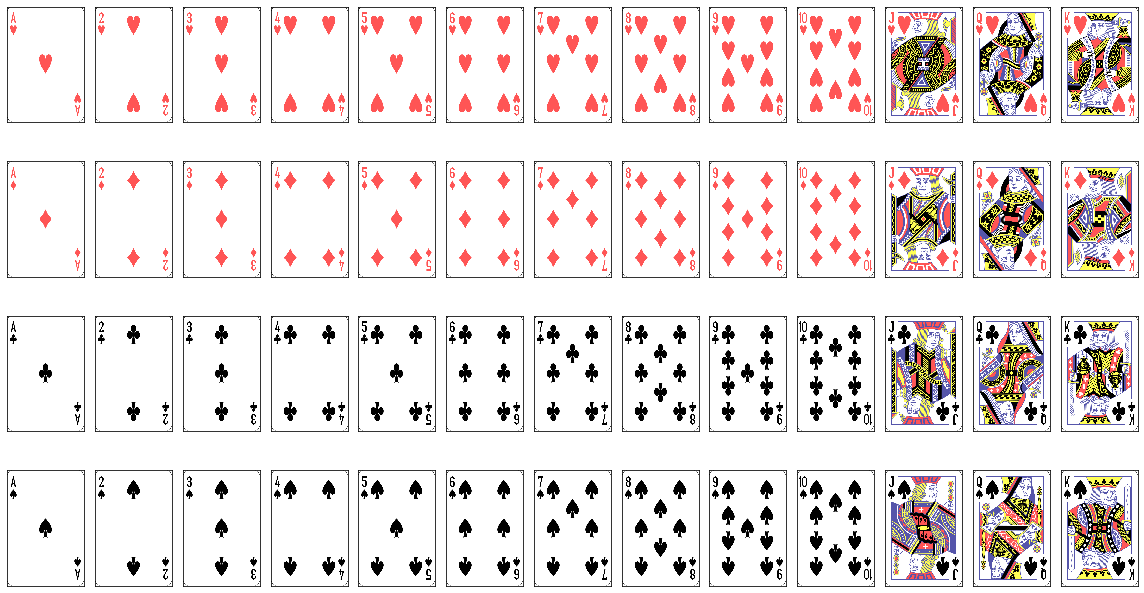

In [80]:
# Combined code for use in Jupyter Notebook.
# All code that updates a Matplotlib Figure must appear in the same cell.
figure, axes_list = plt.subplots(nrows=4, ncols=13)

# added next two statements to increase figure size in notebook
figure.set_figwidth(16)
figure.set_figheight(9)

for axes in axes_list.ravel():  # iterate through 2D array linearly
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    image_name = deck_of_cards.deal_card().image_name
    img = mpimg.imread(str(path.joinpath(image_name).resolve()))
    axes.imshow(img)
    
figure.tight_layout()

### Shuffle and Re-Deal the Deck

In [81]:
deck_of_cards.shuffle()

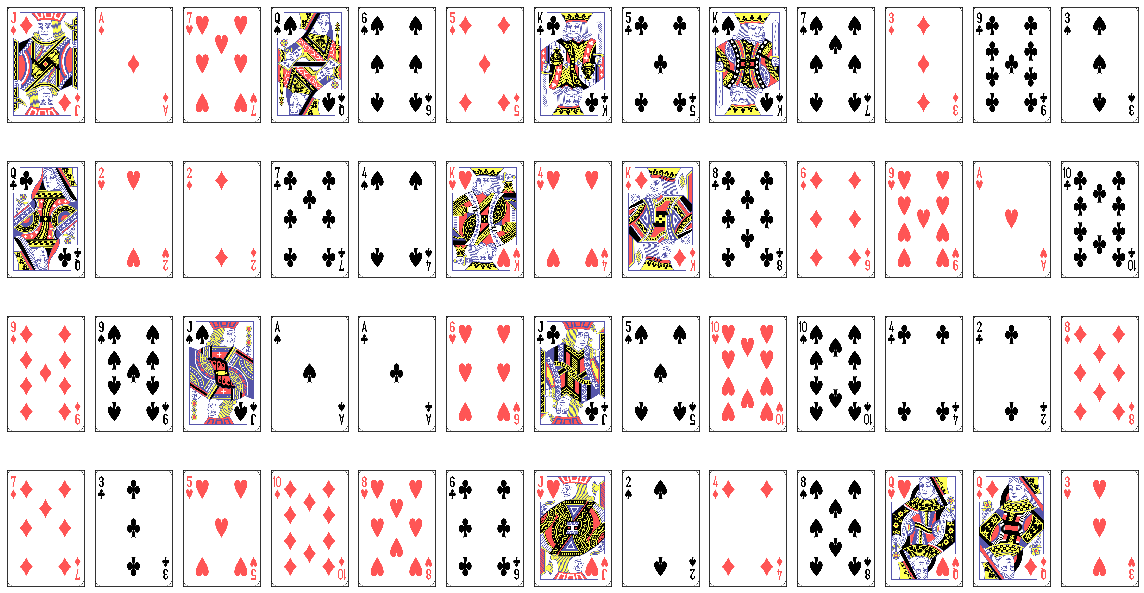

In [82]:
# Combined code for use in Jupyter Notebook.
# All code that updates a Matplotlib Figure must appear in the same cell.
# Duplicated code for creating the subplots so we could display a separate image.
figure, axes_list = plt.subplots(nrows=4, ncols=13)

# added next two statements to increase figure size in notebook
figure.set_figwidth(16)
figure.set_figheight(9)

for axes in axes_list.ravel():
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    image_name = deck_of_cards.deal_card().image_name
    img = mpimg.imread(str(path.joinpath(image_name).resolve()))
    axes.imshow(img)
    
figure.tight_layout()

# 10.13 Python 3.7’s New Data Classes
* **Data classes** (module **`dataclasses`**) help you build classes **faster** with more **concise notation**. 
* Can be **generated dynamically from a list of field names**, like what often is found in **a CSV file's first line**.

### Data Classes Autogenerate "Boilerplate" Code 
* **Autogenerate data attributes** and the **`__init__` and `__repr__` methods** for you. 
* **Autogenerate method `__eq__`**, which **overloads the `==` operator**. 
    * Any class with an **`__eq__` method** implicitly **supports `!=`**&mdash;**all classes inherit `object`’s default `__ne__` (not equals) method implementation**, which returns the opposite of `__eq__` (or `NotImplemented` if the class does not define `__eq__`). 
* Optionally, **generate methods** for the **`<`**, **`<=`**, **`>`** and **`>=`** comparison operators.
* May contain **properties** and **methods**, and participate in class hierarchies. 

```python
# carddataclass.py
"""Card data class with class attributes, data attributes,
autogenerated methods and explicitly defined methods."""
from dataclasses import dataclass
from typing import ClassVar, List

@dataclass  # decorate
class Card:
    FACES: ClassVar[List[str]] = ['Ace', '2', '3', '4', '5', '6', '7', 
                                  '8', '9', '10', 'Jack', 'Queen', 'King']
    SUITS: ClassVar[List[str]] = ['Hearts', 'Diamonds', 'Clubs', 'Spades']

    face: str
    suit: str

    @property
    def image_name(self):
        """Return the Card's image file name."""
        return str(self).replace(' ', '_').lower() + '.png'

    def __str__(self):
        """Return string representation for str()."""
        return f'{self.face} of {self.suit}'
    
    def __format__(self, format):
        """Return formatted string representation."""
        return f'{str(self):{format}}'
```

### Using the `@dataclass` Decorator
* The **decorator `@dataclass(order=True)`** causes the data class to **autogenerate overloaded `<`, `<=`, `>` and `>=` operators**. 
* This might be useful if you need to **sort your data-class objects**.

### Variable Annotations
* **Data classes** declare both **class attributes** and **data attributes** inside the class, but **outside** the class’s methods.
* Data classes require **variable annotations** to distinguish class attributes from data attributes.
* **Variable annotations** also help a data class autogenerate its methods' implementation details.

### Methods `__init__`, `__repr__` and `__eq__`
* **Data classes** inspect the **variable annotations** and include only the **data attributes** in generated method implementations. 

### Variable Annotation Notes
* **Variable annotations** can use built-in types (like **`str`**, **`int`** and **`float`**), class types or types defined by the **`typing` module** (such as **`ClassVar`** and **`List`**). 
* **Type annotations are not enforced at execution time**.
* `Card`’s `face` is meant to be a string, by you can assign it any type of object.

## 10.13.2 Using the `Card` Data Class 


In [83]:
from carddataclass import Card

In [84]:
c1 = Card(Card.FACES[0], Card.SUITS[3])

### Use `Card`’s Autogenerated `__repr__` Method

In [85]:
c1

Card(face='Ace', suit='Spades')

### Use Custom `__str__` Method

In [86]:
print(c1)

Ace of Spades


### Access the Data Class’s Attributes and Read-Only Property 

In [87]:
c1.face

'Ace'

In [88]:
c1.suit

'Spades'

In [89]:
c1.image_name

'Ace_of_Spades.png'

### Compare `Card`s via the Autogenerated `==` Operator and Inherited `!=` Operator

In [90]:
c2 = Card(Card.FACES[0], Card.SUITS[3])

In [91]:
c2

Card(face='Ace', suit='Spades')

In [92]:
c3 = Card(Card.FACES[0], Card.SUITS[0])

In [93]:
c3

Card(face='Ace', suit='Hearts')

In [94]:
c1 == c2

True

In [95]:
c1 == c3

False

In [96]:
c1 != c3

True

### Using the `Card` Data Class in Class `DeckOfCards` 
* The **`deck2.py` file** contains **class `DeckOfCards`** using the **`Card` data class**. 

In [97]:
from deck2 import DeckOfCards  # uses Card data class

In [98]:
deck_of_cards = DeckOfCards()

In [99]:
print(deck_of_cards)

Ace of Hearts      2 of Hearts        3 of Hearts        4 of Hearts        
5 of Hearts        6 of Hearts        7 of Hearts        8 of Hearts        
9 of Hearts        10 of Hearts       Jack of Hearts     Queen of Hearts    
King of Hearts     Ace of Diamonds    2 of Diamonds      3 of Diamonds      
4 of Diamonds      5 of Diamonds      6 of Diamonds      7 of Diamonds      
8 of Diamonds      9 of Diamonds      10 of Diamonds     Jack of Diamonds   
Queen of Diamonds  King of Diamonds   Ace of Clubs       2 of Clubs         
3 of Clubs         4 of Clubs         5 of Clubs         6 of Clubs         
7 of Clubs         8 of Clubs         9 of Clubs         10 of Clubs        
Jack of Clubs      Queen of Clubs     King of Clubs      Ace of Spades      
2 of Spades        3 of Spades        4 of Spades        5 of Spades        
6 of Spades        7 of Spades        8 of Spades        9 of Spades        
10 of Spades       Jack of Spades     Queen of Spades    King of Spades     

## 10.13.4 Data Class Advantages over Traditional Classes
* When you change a **data class's data attributes** then use it in a script or interactive session, the **autogenerated code updates automatically**.
* **Less code to maintain and debug**.
* **Variable annotations** enable some **static code analysis tools** to show potential errors before they can occur at **execution time**&mdash;e.g., warn you when you use the wrong data type.

### More Information on Data Classes 
* [PEP 557](https://www.python.org/dev/peps/pep-0557/)
* [Data Classes in Python documentation](https://docs.python.org/3/library/dataclasses.html)

# More Info 
* See Lesson 10 in [**Python Fundamentals LiveLessons** here on Safari Online Learning](https://learning.oreilly.com/videos/python-fundamentals/9780135917411)
* See Chapter 10 in [**Python for Programmers** on Safari Online Learning](https://learning.oreilly.com/library/view/python-for-programmers/9780135231364/)
* Interested in a print book? Check out:

| Python for Programmers | Intro to Python for Computer<br>Science and Data Science
| :------ | :------
| <a href="https://amzn.to/2VvdnxE"><img alt="Python for Programmers cover" src="../images/PyFPCover.png" width="150" border="1"/></a> | <a href="https://amzn.to/2LiDCmt"><img alt="Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud" src="../images/IntroToPythonCover.png" width="159" border="1"></a>

>Please **do not** purchase both books&mdash;_Python for Programmers_ is a subset of _Intro to Python for Computer Science and Data Science_

&copy; 2019 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the book [**Python for Programmers**](https://amzn.to/2VvdnxE).